# Q&A Activity- Week 10

Do the following on the dataset

1. Load the data into the pandas environment and identify some basic details of the 
dataset.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("employee.csv")
data.head()

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711


In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data.shape

(9, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


In [6]:
data.dtypes

name                  object
age                  float64
income               float64
gender                object
department            object
grade                 object
performance_score      int64
dtype: object

In [7]:
data.isna().sum()

name                 0
age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [8]:
data.nunique()

name                 9
age                  5
income               7
gender               2
department           3
grade                4
performance_score    9
dtype: int64

In [9]:
data.describe(include =object)

,name,gender,department,grade
count,9,7,9,9
unique,9,2,3,4
top,Allen Smith,F,Operations,G3
freq,1,5,3,5


In [10]:
data.value_counts()

name           age   income   gender  department  grade  performance_score
Dheeraj Patel  30.0  42000.0  F       Operations  G2     711                  1
Jack Morgan    32.0  35000.0  M       Finance     G2     674                  1
Josh Wills     54.0  52000.0  F       Finance     G3     901                  1
Leo Duck       23.0  98000.0  M       Sales       G4     709                  1
Ying Chin      45.0  65000.0  F       Sales       G3     556                  1
dtype: int64

2. Reset the index as "name".

In [11]:
data = pd.read_csv("employee.csv",index_col="name")
data.head()


,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711



+3. Select rows for specific names Jack Morgan and Josh wills.

In [12]:
data.loc[['Jack Morgan','Josh Wills']]


,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


4. Select data for multiple values "Sales" and “Finance”.

In [13]:
data_values = data[data["department"].isin(["Sales", "Finance"])]
data_values

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


5. Display employee who has more than 700 performance score.


In [14]:
data[data["performance_score"]>700]




,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


6. Display employee who has more than 500 and less than 700 performance score

In [15]:
data[(data["performance_score"]>500) & (data["performance_score"]<700)]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


7. Check and handle missing values in the dataset.

In [16]:
data.isna().sum()

age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

Age,income and gender are having missing values

In [17]:
data.dtypes

age                  float64
income               float64
gender                object
department            object
grade                 object
performance_score      int64
dtype: object

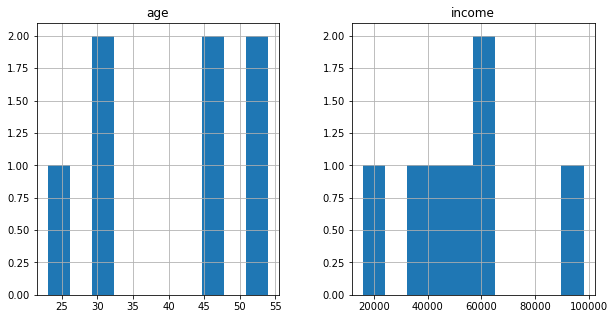

In [18]:
fregraph=data.select_dtypes(include=["float"])
fregraph.hist(figsize=(10,5))
plt.show()

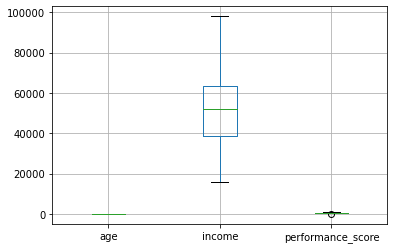

In [19]:
data.boxplot()
plt.show()

There is no outlier for age and income ,so we can use mean to fill missing values

In [20]:
data["age"]=data["age"].fillna(data["age"].mean())
data["income"]=data["income"].fillna(data["income"].mean())
data["gender"]=data["gender"].fillna(data["gender"].bfill())

In [21]:
data.isna().sum()

age                  0
income               0
gender               0
department           0
grade                0
performance_score    0
dtype: int64

8. Check the outliers and handle outliers in performance score using Percentiles.

In [22]:
data.describe()

,age,income,performance_score
count,9.000000,9.000000,9.000000
mean,40.428571,52857.142857,610.666667
std,10.569498,22541.232062,235.671912
min,23.000000,16000.000000,53.000000
25%,32.000000,42000.000000,556.000000
50%,40.428571,52857.142857,674.000000
75%,45.000000,62000.000000,711.000000
max,54.000000,98000.000000,901.000000


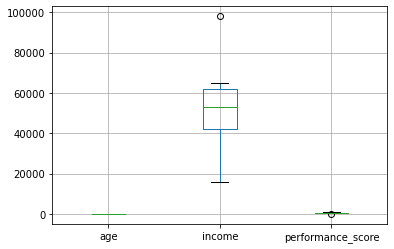

In [23]:
data.boxplot()
plt.show()

No outlier for age ,but income and performance_score having outlier

 handle outliers in performance score using Percentiles

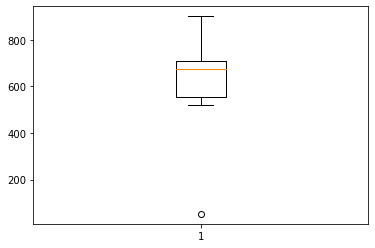

In [24]:
plt.boxplot(data["performance_score"])
plt.show()

In [25]:
Q1=np.percentile(data['performance_score'],25, interpolation ='midpoint')
Q2=np.percentile(data['performance_score'],50, interpolation ='midpoint')
Q3=np.percentile(data['performance_score'],75, interpolation ='midpoint')

In [26]:
print(Q1)
print(Q2)
print(Q3)

556.0
674.0
711.0


In [27]:
IQR =Q3-Q1
IQR

155.0

In [28]:
low_limit = Q1-1.5*IQR
print(low_limit)
upper_limit =Q3+1.5*IQR
print(upper_limit)

323.5
943.5


In [29]:
outlier = []
for x in data["performance_score"]:
    if ((x>upper_limit) or (x<low_limit)):
        outlier.append(x)
print(outlier)

[53]


In [30]:
ind_1 =data["performance_score"]<low_limit
data.loc[ind_1].index


Index(['James Authur'], dtype='object', name='name')

In [31]:
data.drop(['James Authur'],inplace=True)

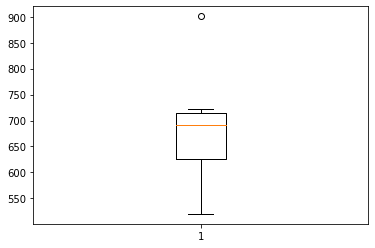

In [32]:
plt.boxplot(data["performance_score"])
plt.show()

outlier removed from performance_score

9. Check the gender column and do Dummy encoding.


In [33]:
data.gender

name
Allen Smith      F
S Kumar          F
Jack Morgan      M
Ying Chin        F
Dheeraj Patel    F
Satyam Sharma    F
Josh Wills       F
Leo Duck         M
Name: gender, dtype: object

In [34]:
data1 = pd.get_dummies(data,columns =["gender"],drop_first=True)
data1.head()

,age,income,department,grade,performance_score,gender_M
name,,,,,,
Allen Smith,45.000000,52857.142857,Operations,G3,723,0
S Kumar,40.428571,16000.000000,Finance,G0,520,0
Jack Morgan,32.000000,35000.000000,Finance,G2,674,1
Ying Chin,45.000000,65000.000000,Sales,G3,556,0
Dheeraj Patel,30.000000,42000.000000,Operations,G2,711,0


10.Do the standard scaling on the feature performance score

In [35]:
type(data1)

pandas.core.frame.DataFrame

In [36]:
data1.describe()

,age,income,performance_score,gender_M
count,8.000000,8.000000,8.00000,8.00000
mean,38.732143,52857.142857,680.37500,0.25000
std,9.903157,24097.590700,116.16729,0.46291
min,23.000000,16000.000000,520.00000,0.00000
25%,31.500000,40250.000000,625.75000,0.00000
50%,40.428571,52428.571429,691.50000,0.00000
75%,45.000000,62750.000000,714.00000,0.25000
max,54.000000,98000.000000,901.00000,1.00000


In [37]:
from sklearn.preprocessing import StandardScaler
scaled_features = data1.copy()
 
col_names = ['performance_score']
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
 
scaled_features[col_names] = features
pd.DataFrame(scaled_features)

,age,income,department,grade,performance_score,gender_M
name,,,,,,
Allen Smith,45.000000,52857.142857,Operations,G3,0.392262,0
S Kumar,40.428571,16000.000000,Finance,G0,-1.475872,0
Jack Morgan,32.000000,35000.000000,Finance,G2,-0.058667,1
Ying Chin,45.000000,65000.000000,Sales,G3,-1.144578,0
Dheeraj Patel,30.000000,42000.000000,Operations,G2,0.281831,0
Satyam Sharma,40.428571,62000.000000,Sales,G3,-0.288733,0
Josh Wills,54.000000,52000.000000,Finance,G3,2.030331,0
Leo Duck,23.000000,98000.000000,Sales,G4,0.263425,1
